## **Piyusha Supe 23CO315**

Practical 5:
Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score


In [ ]:
from google.colab import files
files.upload()

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
# check the dataset for missing values and perform EDA
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [5]:
df.tail()

User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe(include="all")

User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000

In [8]:
df.shape

(400, 5)

In [9]:
df.size

2000

In [10]:
df.ndim

2

In [11]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
df.isnull()

User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      False   False  False            False      False
4      False   False  False            False      False
..       ...     ...    ...              ...        ...
395    False   False  False            False      False
396    False   False  False            False      False
397    False   False  False            False      False
398    False   False  False            False      False
399    False   False  False            False      False

[400 rows x 5 columns]

In [13]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
#select the features and target variable
# Selecting independent variables (features) and dependent variable (target)
X = df[['Age', 'EstimatedSalary']]  # Assuming these are features
y = df['Purchased']  # Target variable


In [16]:
# Splitting dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)



Training Set Size: (320, 2)
Testing Set Size: (80, 2)


In [17]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")



Accuracy: 0.8875


In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values
TN, FP, FN, TP = cm.ravel()

# Print confusion matrix and extracted values
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


Confusion Matrix:
[[50  2]
 [ 7 21]]

True Positives (TP): 21
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 7


In [21]:
precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision:.4f}")



Precision: 0.9130


In [22]:
recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall:.4f}")



Recall: 0.7500


In [23]:
error_rate = 1 - accuracy
print(f"\nError Rate: {error_rate:.4f}")



Error Rate: 0.1125


In [24]:
f1 = f1_score(y_test, y_pred)
print(f"\nF1 Score: {f1:.4f}")



F1 Score: 0.8235


In [25]:
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



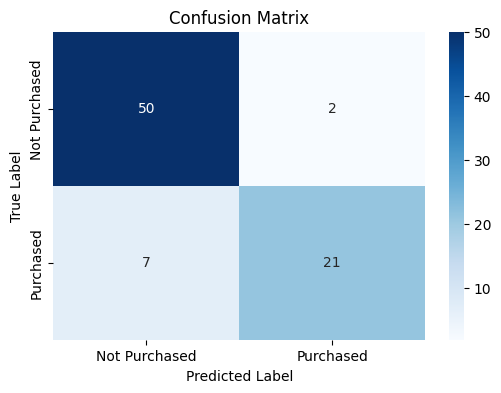

In [26]:
# Visualizing confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


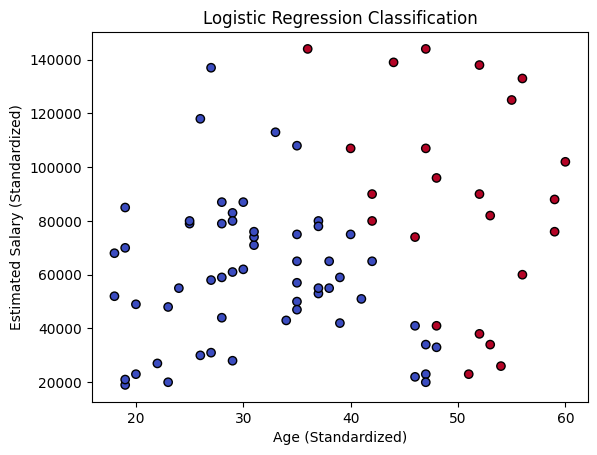

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of test set predictions
# Accessing DataFrame columns using column names
plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_pred, cmap='coolwarm', edgecolors='k')

# Labels and title
plt.xlabel('Age (Standardized)')
plt.ylabel('Estimated Salary (Standardized)')
plt.title('Logistic Regression Classification')

plt.show()